# Lane Detection with Hough Transformations

In [1]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt
import imageio

In [2]:
print("OpenCV Version:\t",cv2.__version__)

OpenCV Version:	 3.4.3


In [3]:
def display_imgs(img_list, labels=[],cols=5, fig_size=(30,30)):
    cmap = None
    rows = len(img_list) / cols
    plt.figure(figsize=fig_size)
    plt.subplots_adjust(left=0.0,right=0.5,wspace=0.0,hspace=0.2)
    for i in range(len(img_list)):
        plt.subplot(rows, cols, i+1)
        if len(img_list[i].shape) == 2:
            cmap = 'gray'
        if len(labels) > 0:
            plt.title(labels[i])
        plt.imshow(img_list[i], cmap=cmap)
    #plt.tight_layout()
    plt.show()

In [84]:
# Configuration Parameters
single_ex = True
img_loc = 'datasets/udacity_challenge_video/challenge_2_frames/3.png'
#img_loc = 'datasets/test_data/singapore_snippet1/100.png'
#img_loc = 'datasets/udacity_challenge_video/challenge_frames/2.png'
#img_loc = 'Vehicle_Detection/images/input.jpg' # Curve Example 
#img_loc = 'datasets/vehicle/Sunny_LISA_3/Sunny_imgs/20191110215_1.png' # Non-working example


In [85]:
if(not single_ex):
    loc = 'datasets/udacity_challenge_video/challenge_frames/'
    for f in os.listdir(loc):
        img = cv2.imread(loc + f)
        imgs.append(img)

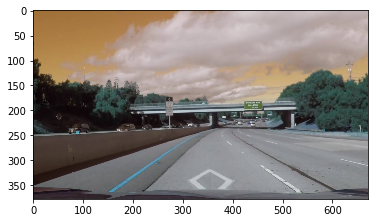

In [86]:
if(single_ex):
    img = cv2.imread(img_loc)
    img = cv2.resize(img,(672, 378))
    plt.imshow(img)
else:
    #display_imgs(imgs)
    pass

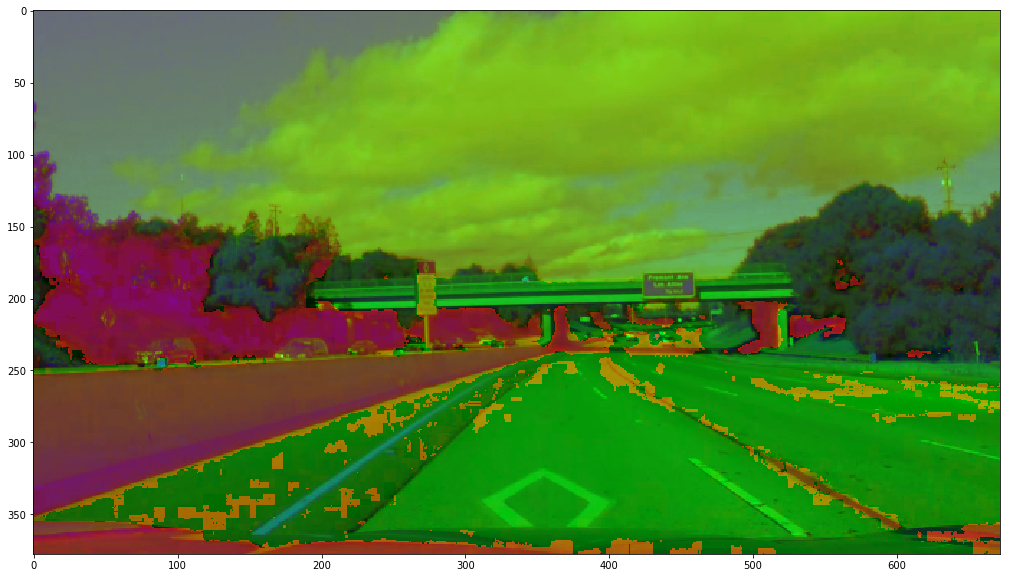

In [87]:
hls_im = None
hls_imgs = []
if(single_ex):
    hls_im = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    plt.figure(figsize = (50,10))
    plt.imshow(hls_im)
else:
    for im in imgs:
        hls_im = cv2.cvtColor(im,cv2.COLOR_BGR2HLS)
        hls_imgs.append(hls_im)

In [88]:
w_lower_b = np.array([0, 200, 0], dtype=np.uint8)
w_upper_b = np.array([200, 255, 255], dtype=np.uint8)
y_lower_b = np.array([10, 0, 100], dtype=np.uint8) 
y_upper_b = np.array([40, 255, 255], dtype=np.uint8)

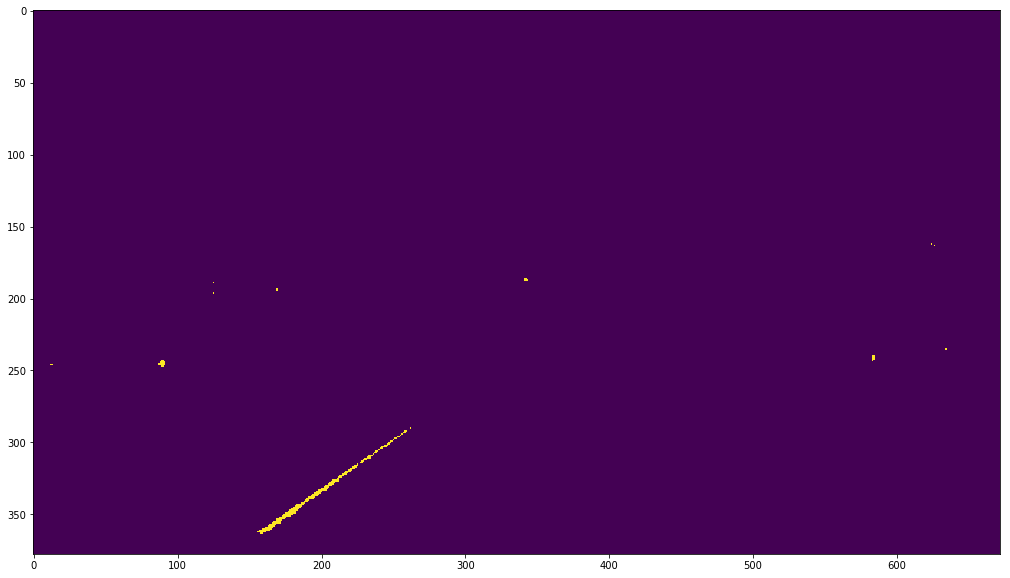

In [89]:
# Yellow Lanes
yellow_mask = None
yellow_masks = []
if(single_ex):
    yellow_mask = cv2.inRange(hls_im,y_lower_b,y_upper_b)
    plt.figure(figsize = (50,10))
    plt.imshow(yellow_mask)
else:
    for im in hls_imgs:
        yellow_mask = cv2.inRange(im,y_lower_b,y_upper_b) 
        yellow_masks.append(yellow_mask)

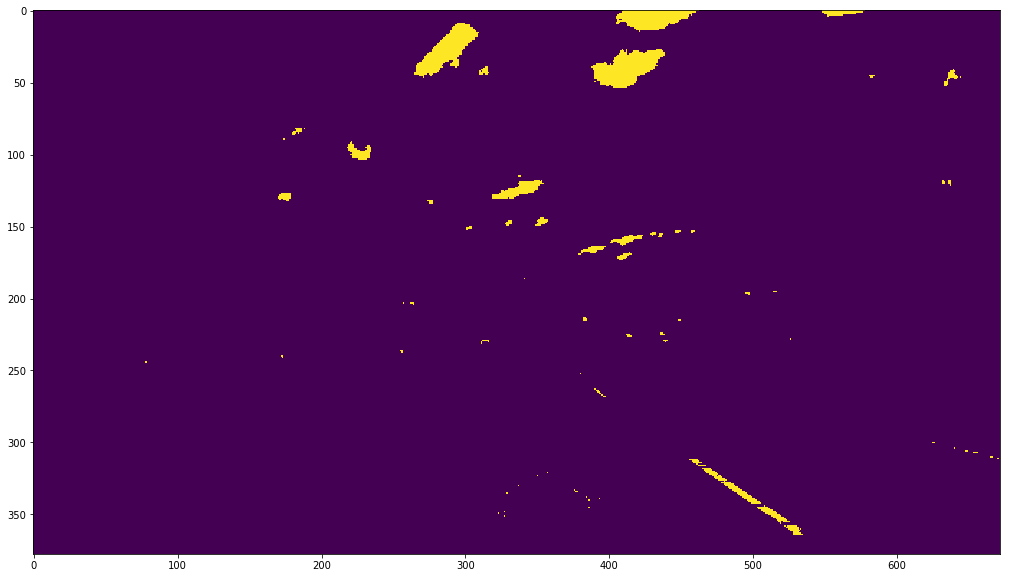

In [90]:
# White Lanes
white_mask = None
white_masks = []
if(single_ex):
    white_mask = cv2.inRange(hls_im,w_lower_b,w_upper_b)
    plt.figure(figsize = (50,10))
    plt.imshow(white_mask)
else:
    for im in hls_imgs:
        white_mask = cv2.inRange(hls_im,w_lower_b,w_upper_b)
        white_masks.append(white_mask)


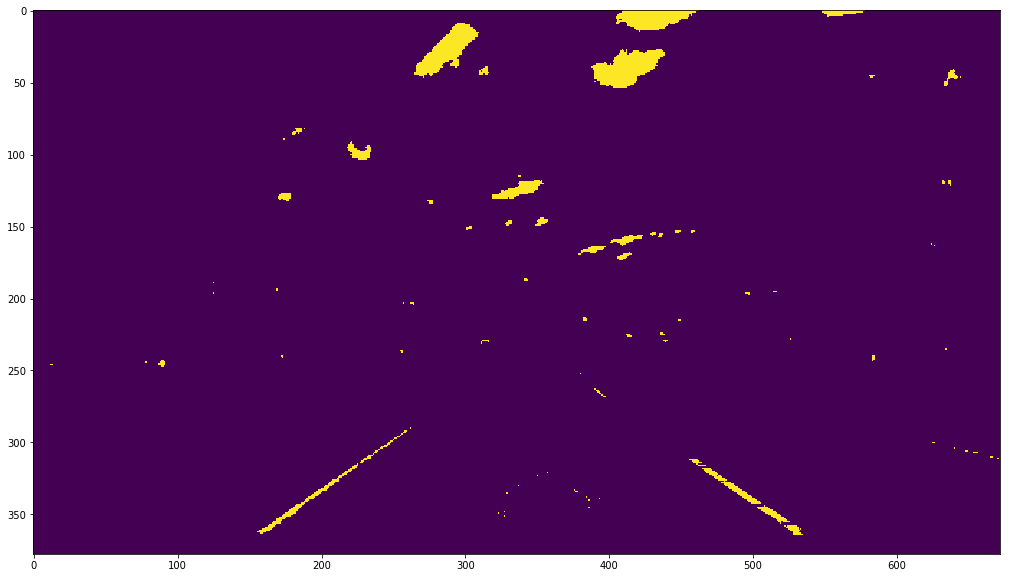

In [91]:
# Both types of lanes
combined_mask = None
combined_masks = []
if(single_ex):
    combined_mask = cv2.bitwise_or(yellow_mask,white_mask)
    plt.figure(figsize = (50,10))
    plt.imshow(combined_mask)
else:
    for y_mask,w_mask in zip(yellow_masks,white_masks):
        combined_mask = cv2.bitwise_or(y_mask,w_mask)
        combined_masks.append(combined_mask)

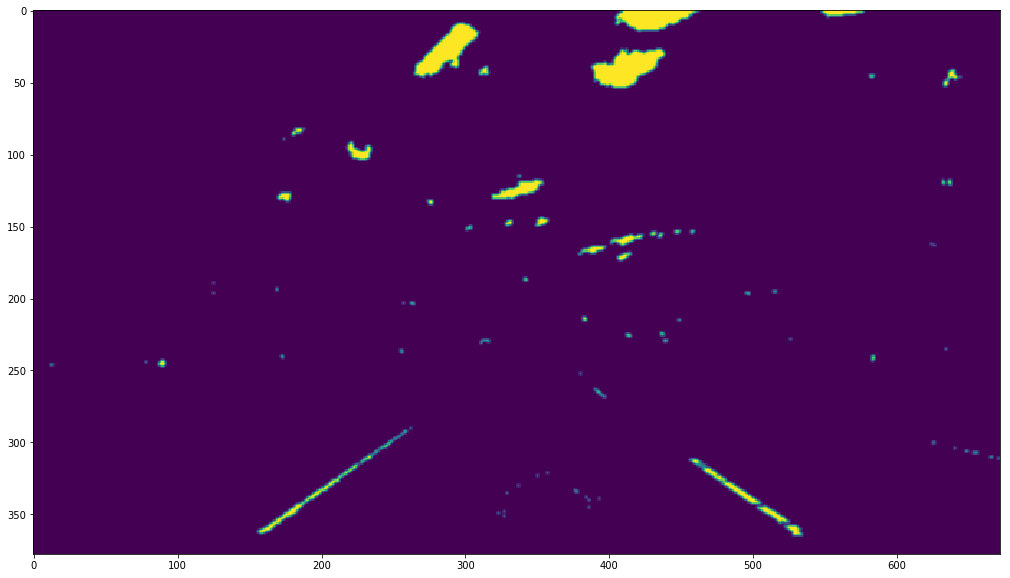

In [92]:
# Blur Masked Image
blurred_mask = None
blurred_masks = []
if(single_ex):
    blurred_mask = cv2.GaussianBlur(combined_mask,(3,3),0)
    plt.figure(figsize = (50,10))
    plt.imshow(blurred_mask)
else:
    for im in combined_masks:
        blurred_mask = cv2.GaussianBlur(im,(7,7),0)
        blurred_masks.append(blurred_mask)

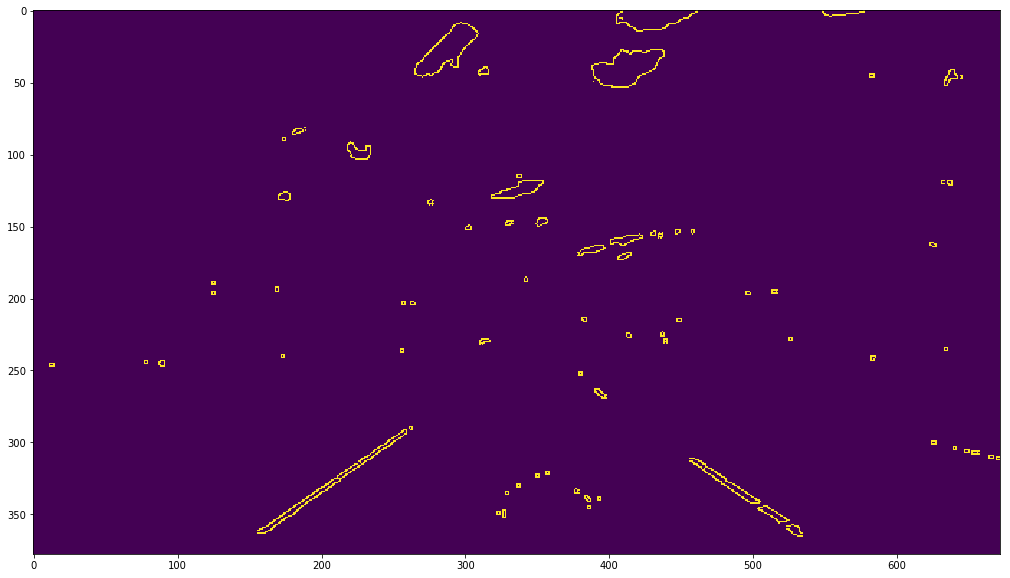

In [93]:
edges = None
edges_ims = []
if(single_ex):
    edges = cv2.Canny(blurred_mask,100,190) # 100,190
    plt.figure(figsize = (50,10))
    plt.imshow(edges,interpolation='nearest')
else:
    last = None
    for im in blurred_masks:
        edges = cv2.Canny(im,100,150)
        edges_ims.append(edges)
        last = edges
    plt.figure(figsize = (50,10))
    plt.imshow(last)

In [94]:
def get_lanes(roi_im):
    lines = cv2.HoughLinesP(roi_im,rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)
    return lines

def draw_lines(image,lines):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),color=[255, 0, 0],thickness=2)
    return image

# if(single_ex):
#     lines = get_lanes(edges)
#     image = draw_lines(edges,lines)
#     plt.figure(figsize = (50,10))
#     plt.imshow(image)
# else:
#     last = None
#     for im,edges in zip(imgs,edges_ims):
#         lines = get_lanes(edges)
#         image = draw_lines(im,lines)
#         last = image
#     plt.figure(figsize = (50,10))
#     plt.imshow(last)

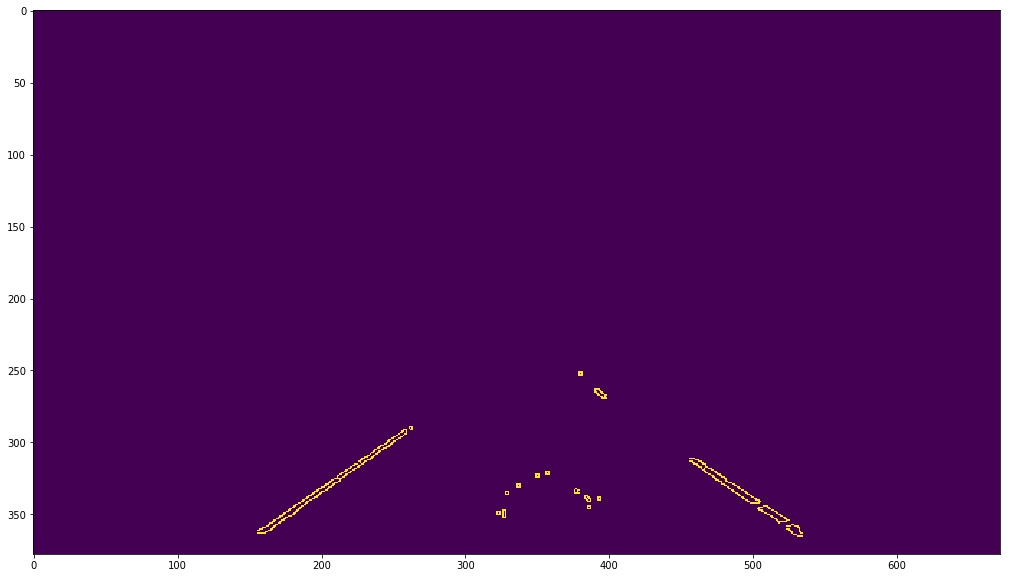

In [95]:
plt.close()

roi = np.array([
    [0,1],
    [1,1],
    [0.518,0.59],
    [0.518,0.59]
])

# Get ROI
def get_roi(img,roi):
    rows, cols = img.shape[:2]
    #print('img rows={} --- img cols={}'.format(rows,cols))
    mask = np.zeros_like(img)
    
    #print(mask)
    
    left_bottom = np.array([int(cols * roi[0][0]), int(rows) * roi[0][1]])
    right_bottom = np.array([int(cols * roi[1][0]), int(rows) * roi[1][1]])
    left_top = np.array([int(cols * roi[2][0]),int(rows * roi[2][1])])
    right_top = np.array([int(cols * roi[3][0]), int(rows * roi[3][1])])
#     print(left_bottom)
#     print(right_bottom)
#     print(left_top)
#     print(right_top)
    w = right_top[0] - left_top[0]
    h = left_bottom[1] - left_top[1]
    #print("w = ",w)
    #print("h = ",h)
    #cv2.line(img,tuple(left_bottom),tuple(right_top),color=[255, 0, 0],thickness=2)
    #cv2.line(img,tuple(left_top),tuple(right_bottom),color=[255, 0, 0],thickness=2)
    #cv2.rectangle(img,tuple(left_top),(left_top[0]+w,left_top[1]+h),color=[255, 0, 0],thickness=2)
    
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)
    if len(mask.shape) == 2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255, ) * mask.shape[2])
    return cv2.bitwise_and(img, mask)


roi_im = None
roi_imgs = []

if(single_ex):
    roi_im = get_roi(edges,roi)
    plt.figure(figsize = (50,10))
    plt.imshow(roi_im)
else:
    last = None
    for im in edges_ims:
        roi = get_roi(im)
        roi_imgs.append(roi)
        last = roi
    plt.figure(figsize = (50,10))
    plt.imshow(last)

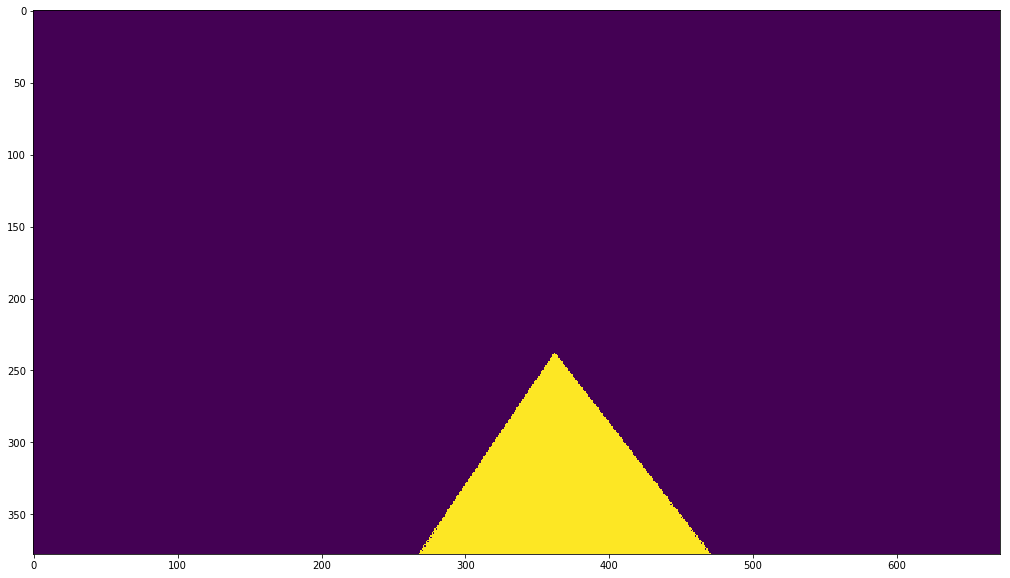

In [96]:
def roi_remove_middle(img):
    rows, cols = img.shape[:2]
    #print('img rows={} --- img cols={}'.format(rows,cols))
    mask = np.zeros_like(img)
    inner_mask = np.zeros_like(img)
    empty_mask = np.zeros_like(img)
    
    t_left_bottom = np.array([int(cols * 0.4), int(rows)])
    t_right_bottom = np.array([int(cols * 0.7), int(rows)])
    t_left_top = np.array([int(cols * 0.54),int(rows * 0.63)])
    t_right_top = np.array([int(cols * 0.54), int(rows * 0.63)])

    t_w = t_right_top[0] - t_left_top[0]
    t_h = t_left_bottom[1] - t_left_top[1]

    #cv2.line(img,tuple(left_bottom),tuple(right_top),color=[255, 0, 0],thickness=2)
    #cv2.line(img,tuple(left_top),tuple(right_bottom),color=[255, 0, 0],thickness=2)
    inner_vertices = np.array([[t_left_bottom, t_left_top, t_right_top, t_right_bottom]], dtype=np.int32)
    
    
    if len(mask.shape) == 2:
        cv2.fillPoly(inner_mask, inner_vertices, 255)
    else:
        cv2.fillPoly(inner_mask, inner_vertices, (0, ) * mask.shape[2])
    return inner_mask
    
if(single_ex):
    roi_test_im = np.copy(roi_im)
    new_roi_im = roi_remove_middle(roi_im)
    plt.figure(figsize = (50,10))
    plt.imshow(new_roi_im)

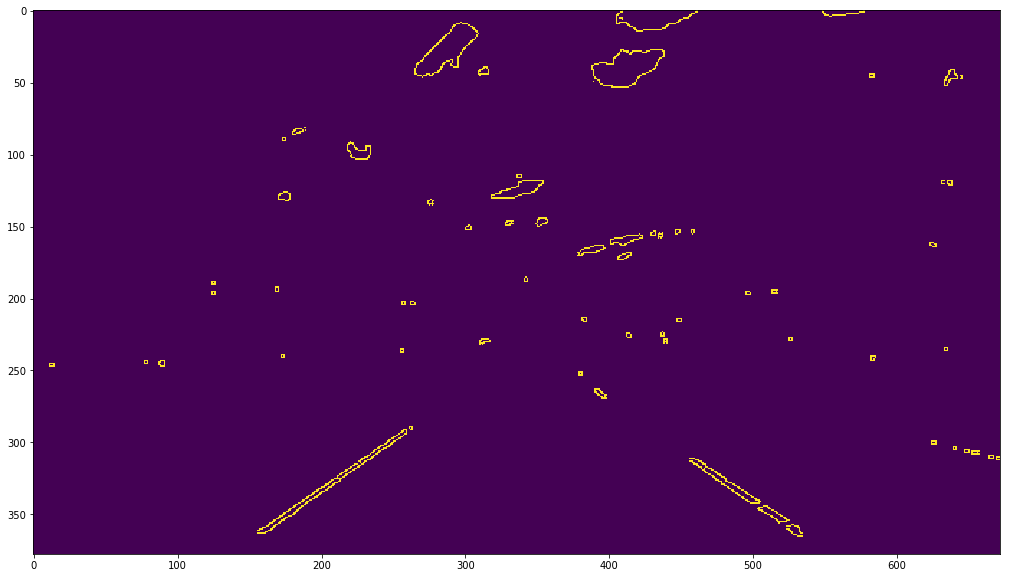

In [97]:
def remove_poly(img,mask):
    for r_idx,(irow,mrow) in enumerate(zip(img,mask)):
        for c_idx,(icol,mcol) in enumerate(zip(irow,mrow)):
            if(icol == 255 and mcol == 255):
                img[r_idx][c_idx] = 0
    return img

new_edges = remove_poly(edges,new_roi_im)  
plt.figure(figsize = (50,10))
plt.imshow(new_edges)

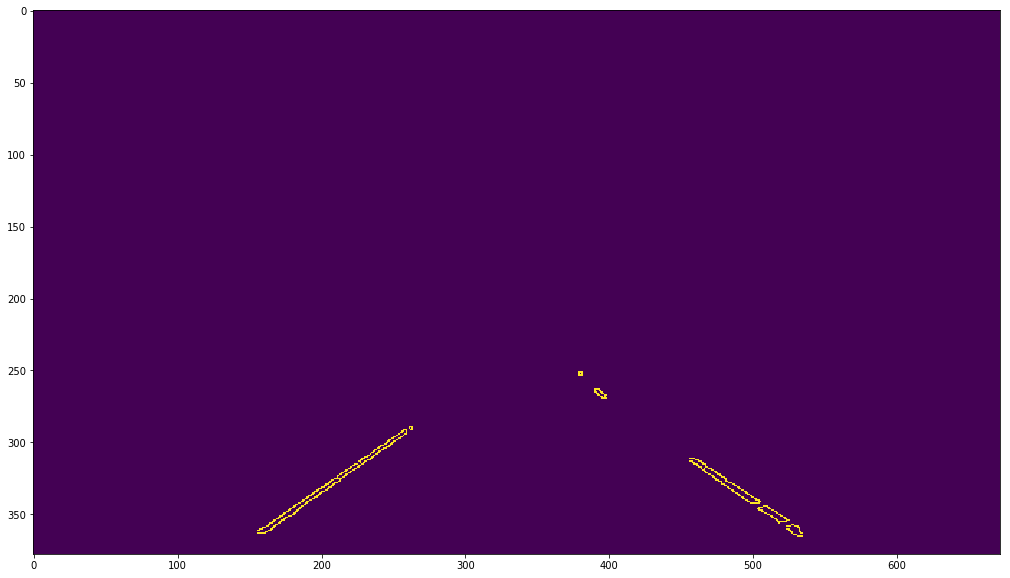

In [98]:
roi_im = None
roi_imgs = []

if(single_ex):
    roi_im = get_roi(new_edges,roi)
    plt.figure(figsize = (50,10))
    plt.imshow(roi_im)

In [99]:
def get_highest_pts(lines):
    pt1 = lines[0][0][:2]
    pt2 = lines[0][0][-2:]
    for line in lines:
        for x1,y1,x2,y2 in line:
            if(x1<650 and y1 < pt1[1]):
                pt1 = [x1,y1]
            if(x2<650 and y2 < pt1[1]):
                pt1 = [x2,y2]
            if(x1>650 and y1 < pt2[1]):
                pt2 = [x1,y1]
            if(x2>650 and y2 < pt2[1]):
                pt2 = [x2,y2]
#             if(y1 < pt1[1]):
#                 pt1 = [x1,y1]
#             if(y2 < pt2[1]):
#                 pt2 = [x2,y2]
    pt1 = np.array(pt1)
    pt2 = np.array(pt2)
    return np.expand_dims(np.concatenate((pt1,pt2)).reshape((1,-1)),axis=1)


def get_highest_pts2(lines,l_thresh = 650,r_thresh = 650):
    lines = np.array(lines)
    pt1 = np.squeeze(lines[:,:,:2])
    pt2 = np.squeeze(lines[:,:,-2:])
    pts = np.concatenate((pt1,pt2))
    pts = pts[pts[:,0].argsort()]
    l_highest_pt = [pts[0][0],10000]
    r_highest_pt = [pts[1][0],10000]
    #print(l_highest_pt)
    #print(r_highest_pt)
    for pt in pts:
        x = pt[0]
        y = pt[1]
        if(x < l_thresh and y < l_highest_pt[1]):
            l_highest_pt = [x,y]
        if(x > r_thresh and y < r_highest_pt[1]):
            r_highest_pt = [x,y]
    pt1 = np.array(l_highest_pt)
    pt2 = np.array(r_highest_pt)
    return np.expand_dims(np.concatenate((pt1,pt2)).reshape((1,-1)),axis=1)

def get_lowest_pts(lines,l_thresh = 650,r_thresh = 650):
    lines = np.array(lines)
    pt1 = np.squeeze(lines[:,:,:2])
    pt2 = np.squeeze(lines[:,:,-2:])
    pts = np.concatenate((pt1,pt2))
    pts = pts[pts[:,0].argsort()]
    l_lowest_pt = [pts[0][0],0]
    r_lowest_pt = [pts[1][0],0]
    for pt in pts:
        x = pt[0]
        y = pt[1]
        if(x < l_thresh and y > l_lowest_pt[1]):
            l_lowest_pt = [x,y]
        if(x > r_thresh and y > r_lowest_pt[1]):
            r_lowest_pt = [x,y]
    pt1 = np.array(l_lowest_pt)
    pt2 = np.array(r_lowest_pt)
    return np.expand_dims(np.concatenate((pt1,pt2)).reshape((1,-1)),axis=1)


def extrapolate_lane(line,y_pt):
    # Calculate slope
    slope = (line[1][1] - line[0][1])/(line[1][0] - line[0][0])
    y_intercept = line[1][1] - slope * (line[1][0])
    x = y_pt/slope - y_intercept
    x = int(x)
    return (x,y_pt)

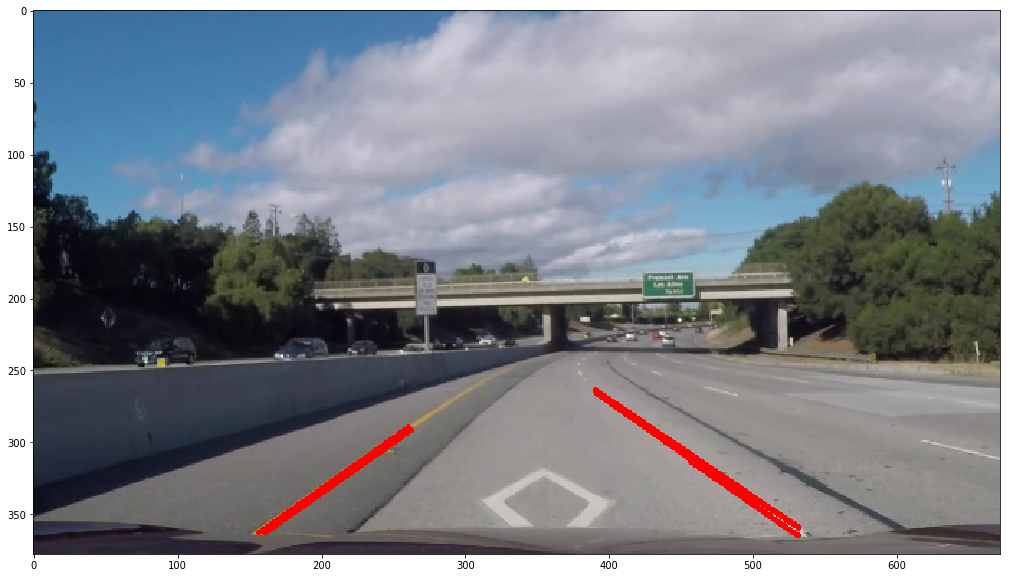

In [100]:
if(single_ex):
    # Convert Img to RGB
    rgb_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # Get the Hough Lines
    lines = get_lanes(roi_im)
    lines = np.squeeze(lines)
    for x1,y1,x2,y2 in lines:
        cv2.line(rgb_im,(x1,y1),(x2,y2),color=[255, 0, 0],thickness=2)
    plt.figure(figsize = (50,10))
    plt.imshow(rgb_im)

[261 289 390 263]


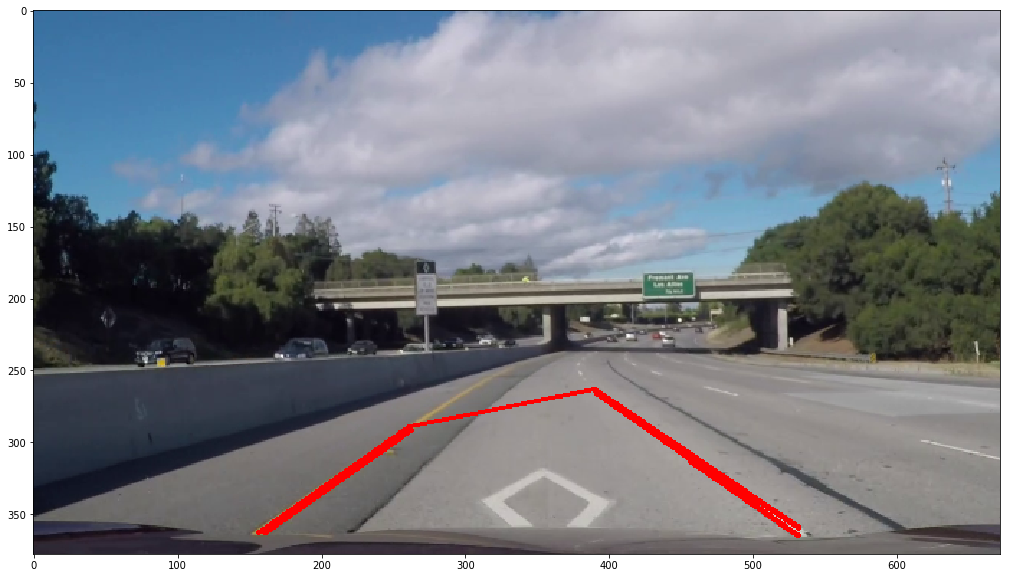

In [101]:
if(single_ex):
    # Convert Img to RGB
    rgb_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # Get the Hough Lines
    lines = get_lanes(roi_im)
    t_lines = np.squeeze(lines)
    for x1,y1,x2,y2 in t_lines:
        cv2.line(rgb_im,(x1,y1),(x2,y2),color=[255, 0, 0],thickness=2)
    # Get the highest and lowest points
    connect_lane_line = get_highest_pts2(lines,370,370)
    debug_connect_lane_line = np.squeeze(connect_lane_line)
    print(debug_connect_lane_line)
    cv2.line(rgb_im,(debug_connect_lane_line[0],debug_connect_lane_line[1]),(debug_connect_lane_line[2],debug_connect_lane_line[3]),color=[255, 0, 0],thickness=2)
    
    plt.figure(figsize = (50,10))
    plt.imshow(rgb_im)

In [102]:
# if(single_ex):
#     # Convert Img to RGB
#     rgb_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     # Get the Hough Lines
#     lines = get_lanes(roi_im)
#     t_lines = np.squeeze(lines)
#     for x1,y1,x2,y2 in t_lines:
#         cv2.line(rgb_im,(x1,y1),(x2,y2),color=[255, 0, 0],thickness=2)
#     # Get the highest and lowest points
#     connect_lane_line = get_highest_pts2(lines,300,370)
#     debug_connect_lane_line = np.squeeze(connect_lane_line)
#     cv2.line(rgb_im,
#              (debug_connect_lane_line[0],debug_connect_lane_line[1]),
#              (debug_connect_lane_line[2],debug_connect_lane_line[3]),
#              color=[255, 0, 0],thickness=2)
    
# #     lowest_pts = get_lowest_pts(lines)
# #     debug_lwst_pts = np.squeeze(lowest_pts)
# #     cv2.line(rgb_im,
# #             (debug_lwst_pts[0],debug_lwst_pts[1]),
# #             (debug_lwst_pts[2],debug_lwst_pts[3]),
# #              color=[255,0,0],thickness=2
# #     )
    
#     arr_top = np.squeeze(connect_lane_line)
#     arr_low = np.squeeze(lowest_pts)
    
#     # Extrapolate the line
#     current_right_line = [(arr_low[2],arr_low[3]),
#                           (arr_top[2],arr_top[3])
#                          ]
#     cv2.line(rgb_im,current_right_line[0],current_right_line[1],color=[0,255,0],thickness=2)
    
#     left_low_y = arr_low[1]
#     adjusted_right_line = extrapolate_lane(current_right_line,left_low_y)
    
#     cv2.line(rgb_im,(arr_low[0],arr_low[1]),
#                     (arr_top[0],arr_top[1]),
#              color=[255, 0, 0],
#              thickness=2
#             )
    
#     cv2.line(rgb_im,(adjusted_right_line[0],adjusted_right_line[1]),
#                     (arr_top[2],arr_top[3]),
#              color=[255, 0, 0],
#              thickness=2
#             )
    
#     plt.figure(figsize = (50,10))
#     plt.imshow(rgb_im)

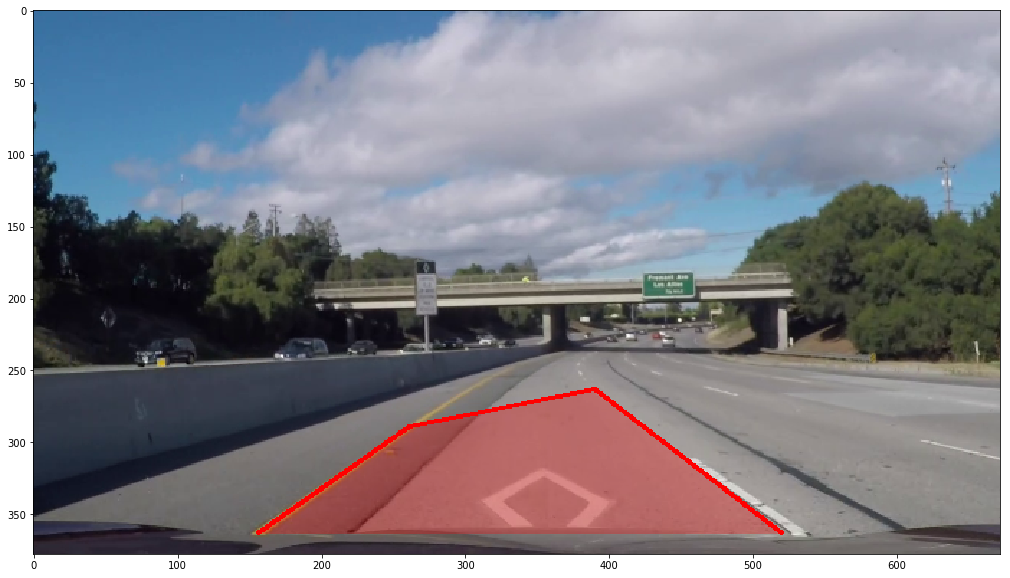

In [103]:
rgb_im = None
lines = None
predicted_lanes = []

if(single_ex):
    # Convert Img to RGB
    rgb_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    # Get the Hough Lines
    lines = get_lanes(roi_im)
    
    # Get the highest and lowest points
    connect_lane_line = get_highest_pts2(lines,370,370)
    lowest_pts = get_lowest_pts(lines,300,370)
    arr_top = np.squeeze(connect_lane_line)
    arr_low = np.squeeze(lowest_pts)
    # Extrapolate the line
    current_right_line = [(arr_low[2],arr_low[3]),
                          (arr_top[2],arr_top[3])
                         ]
    left_low_y = arr_low[1]
    adjusted_right_line = extrapolate_lane(current_right_line,left_low_y)
    
    cv2.line(rgb_im,(arr_low[0],arr_low[1]),
                    (arr_top[0],arr_top[1]),
             color=[255, 0, 0],
             thickness=2
            )
    
    cv2.line(rgb_im,(adjusted_right_line[0],adjusted_right_line[1]),
                    (arr_top[2],arr_top[3]),
             color=[255, 0, 0],
             thickness=2
            )
    
    rgb_im = draw_lines(rgb_im,connect_lane_line)
    overlay = np.zeros_like(rgb_im)
    np.copyto(overlay,rgb_im)
    lane_area = np.array([[[arr_low[0],arr_low[1]],
                          [adjusted_right_line[0],adjusted_right_line[1]],
                          [arr_top[2],arr_top[3]],
                          [arr_top[0],arr_top[1]]
                         ]],dtype=np.int32)
    
    # Cover lane area location
    cv2.fillPoly(overlay,lane_area,color=255)
    alpha = 0.3
    cv2.addWeighted(overlay,alpha,rgb_im,1-alpha,0,rgb_im)
    plt.figure(figsize = (50,10))
    plt.imshow(rgb_im)
else:
    last = None
    for bgr_im,roi_edges in zip(imgs,roi_imgs):
        rgb_im = cv2.cvtColor(bgr_im,cv2.COLOR_BGR2RGB)
        lines = get_lanes(roi_edges)
        connect_lane_line = get_highest_pts2(lines)
        lowest_pts = get_lowest_pts(lines)
        arr_top = np.squeeze(connect_lane_line)
        arr_low = np.squeeze(lowest_pts)
        
        # Extrapolate the line
        current_right_line = [(arr_low[2],arr_low[3]),
                              (arr_top[2],arr_top[3])
                             ]
        left_low_y = arr_low[1]
        adjusted_right_line = extrapolate_lane(current_right_line,left_low_y)

        cv2.line(rgb_im,(arr_low[0],arr_low[1]),
                        (arr_top[0],arr_top[1]),
                 color=[255, 0, 0],
                 thickness=2
                )

        cv2.line(rgb_im,(adjusted_right_line[0],adjusted_right_line[1]),
                        (arr_top[2],arr_top[3]),
                 color=[255, 0, 0],
                 thickness=2
                )
        
        pred = draw_lines(rgb_im,connect_lane_line)
        overlay = np.zeros_like(rgb_im)
        np.copyto(overlay,rgb_im)
        lane_area = np.array([[[arr_low[0],arr_low[1]],
                              [adjusted_right_line[0],adjusted_right_line[1]],
                              [arr_top[2],arr_top[3]],
                              [arr_top[0],arr_top[1]]
                             ]],dtype=np.int32)
        # Cover lane area location
        cv2.fillPoly(overlay,lane_area,color=255)
        alpha = 0.3
        cv2.addWeighted(overlay,alpha,rgb_im,1-alpha,0,rgb_im)
        last = pred
        predicted_lanes.append(pred)
    plt.figure(figsize = (50,10))
    plt.imshow(last)

In [165]:
if(single_ex):
    pass
else:
    #display_imgs(predicted_lanes)
    pass

In [166]:
save_gif = False
save_vid = False
if(save_gif):
    imageio.mimsave('outputs/detected_lanes_py_6.gif', predicted_lanes)
elif(save_vid):
    height,width,_ = predicted_lanes[0].shape
    out = cv2.VideoWriter('outputs/detected_lanes_py_7.avi',0, 30, (width,height))
    for i in range(len(predicted_lanes)):
        rgb_im = cv2.cvtColor(predicted_lanes[i],cv2.COLOR_BGR2RGB)
        out.write(rgb_im)
    out.release()